LACOUX coline <br>
NARTZ Kévin 

### Projet MADMC 2020
# Sélection bi-objectifs avec coefficients intervalles

In [307]:
from algorithms import *
from experiments import *
import matplotlib.pyplot as plt
from utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Première procédure de résolution

In [237]:
# DATA
n = 6
k = 3
alpha_min = 0.1
alpha_max = 0.95
E = generate_vectors(n,10).astype(int)

In [238]:
minimax_sol, minimax_sol_i, pareto_front, pareto_front_i, P, I = two_phased_pareto(E, k, alpha_min, alpha_max)
print("Point minimax dans l'espace des objectifs : ", minimax_sol)
print("Objets séléctionnés: ", minimax_sol_i)

---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%
Point minimax dans l'espace des objectifs :  (24, 22)
Objets séléctionnés:  [0, 2, 3]


In [239]:
P

,0:[10 4],1:[12 15],2:[7 8],3:[ 7 10],4:[10 11],5:[10 7]
Taille,,,,,,
0,"[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]"
1,"[[10, 4]]","[[10, 4]]","[[7, 8], [10, 4]]","[[7, 8], [10, 4]]","[[7, 8], [10, 4]]","[[7, 8], [10, 4]]"
2,[],"[[22, 19]]","[[17, 12]]","[[14, 18], [17, 12]]","[[14, 18], [17, 12]]","[[20, 11], [14, 18], [17, 12]]"
3,[],[],"[[29, 27]]","[[24, 22]]","[[24, 22]]","[[27, 19], [24, 22]]"


In [240]:
I

,0:[10 4],1:[12 15],2:[7 8],3:[ 7 10],4:[10 11],5:[10 7]
Taille,,,,,,
0,[],[],[],[],[],[]
1,[[0]],[[0]],"[[2], [0]]","[[2], [0]]","[[2], [0]]","[[2], [0]]"
2,[],"[[0, 1]]","[[0, 2]]","[[2, 3], [0, 2]]","[[2, 3], [0, 2]]","[[0, 5], [2, 3], [0, 2]]"
3,[],[],"[[0, 1, 2]]","[[0, 2, 3]]","[[0, 2, 3]]","[[0, 2, 5], [0, 2, 3]]"


# Seconde procédure de résolution

On s'assure que la transformation est fiable en testant la réduction puis reconstruction sur 1000 vecteurs aléatoires

In [294]:
check_transform()

In [295]:
# DATA
alpha_min = 0.1
alpha_max = 0.8

In [296]:
minimax_sol_red, minimax_sol_i_red, pareto_front_red, pareto_front_i_red, P_red, I_red = two_phased_idominance(E, k, alpha_min, alpha_max)
print("Point minimax dans l'espace des objectifs : ", minimax_sol_red)
print("Objets séléctionnés: ", minimax_sol_i_red)

---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%
Point minimax dans l'espace des objectifs :  (11.9252, 10.94397)
Objets séléctionnés:  [4, 47]


In [297]:
P_red

,0:[10.17866252 8.81941328],1:[9.12616365 8.71257826],2:[10.46656788 10.21773087],3:[11.06387956 8.57508223],4:[4.42596475 5.21068719],5:[13.53143991 11.70513784],6:[12.66143679 9.83834795],7:[6.78749905 9.0128544 ],8:[15.57868357 11.72228242],9:[10.46951678 6.72267186],...,40:[ 8.60985679 10.09975716],41:[6.88246159 6.97441308],42:[ 7.45716616 13.73250329],43:[10.61723365 12.91535933],44:[12.00789644 9.6559693 ],45:[10.37035427 10.62473591],46:[ 9.15059917 11.85491927],47:[6.61613161 6.5182666 ],48:[ 8.52538056 11.44799835],49:[11.79929476 13.17963672]
Taille,,,,,,,,,,,,,,,,,,,,,
0,"[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]",...,"[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]"
1,"[[10.17866251609614, 8.819413276756746]]","[[9.12616364832204, 8.712578264028528]]","[[9.12616364832204, 8.712578264028528]]","[[11.063879562495753, 8.575082234119808], [9.1...","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]",...,"[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]","[[4.425964746100498, 5.210687190726622]]"
2,[],"[[19.30482616441818, 17.531991540785274]]","[[19.30482616441818, 17.531991540785274]]","[[20.19004321081779, 17.287660498148334], [19....","[[15.48984430859625, 13.78576942484643], [13.5...","[[15.48984430859625, 13.78576942484643], [13.5...","[[15.48984430859625, 13.78576942484643], [13.5...","[[11.213463792045278, 14.223541585938806], [15...","[[11.213463792045278, 14.223541585938806], [15...","[[14.89548152958957, 11.93335905096217], [11.2...",...,"[[13.87813376775918, 10.766091233965845], [11....","[[11.308426331525409, 12.185100267986444], [13...","[[11.308426331525409, 12.185100267986444], [13...","[[11.308426331525409, 12.185100267986444], [13...","[[11.308426331525409, 12.185100267986444], [13...","[[11.308426331525409, 12.185100267986444], [13...","[[11.308426331525409, 12.185100267986444], [13...","[[11.042096352579897, 11.72895378956462], [13....","[[11.042096352579897, 11.72895378956462], [13....","[[11.042096352579897, 11.72895378956462], [13...."


In [298]:
P_rec = reconstruct_P(P_red, alpha_min, alpha_max)
P_rec

,0:[10.17866252 8.81941328],1:[9.12616365 8.71257826],2:[10.46656788 10.21773087],3:[11.06387956 8.57508223],4:[4.42596475 5.21068719],5:[13.53143991 11.70513784],6:[12.66143679 9.83834795],7:[6.78749905 9.0128544 ],8:[15.57868357 11.72228242],9:[10.46951678 6.72267186],...,40:[ 8.60985679 10.09975716],41:[6.88246159 6.97441308],42:[ 7.45716616 13.73250329],43:[10.61723365 12.91535933],44:[12.00789644 9.6559693 ],45:[10.37035427 10.62473591],46:[ 9.15059917 11.85491927],47:[6.61613161 6.5182666 ],48:[ 8.52538056 11.44799835],49:[11.79929476 13.17963672]
Taille,,,,,,,,,,,,,,,,,,,,,
0,"[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]",...,"[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]"
1,"[[8.43106, 10.37284]]","[[8.59441, 9.18525]]","[[8.59441, 9.18525]]","[[7.864, 11.41942], [8.59441, 9.18525]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]",...,"[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]","[[5.43489, 4.31386]]"
2,[],"[[17.02547, 19.55809]]","[[17.02547, 19.55809]]","[[16.45841, 20.60467], [17.02547, 19.55809]]","[[13.29889, 15.73328], [14.0293, 13.49911]]","[[13.29889, 15.73328], [14.0293, 13.49911]]","[[13.29889, 15.73328], [14.0293, 13.49911]]","[[15.08356, 10.78345], [13.29889, 15.73328], [...","[[15.08356, 10.78345], [13.29889, 15.73328], [...","[[11.08704, 15.31864], [15.08356, 10.78345], [...",...,"[[9.87694, 14.32271], [12.89779, 11.24593], [1...","[[12.43558, 11.18319], [9.87694, 14.32271], [1...","[[12.43558, 11.18319], [9.87694, 14.32271], [1...","[[12.43558, 11.18319], [9.87694, 14.32271], [1...","[[12.43558, 11.18319], [9.87694, 14.32271], [1...","[[12.43558, 11.18319], [9.87694, 14.32271], [1...","[[12.43558, 11.18319], [9.87694, 14.32271], [1...","[[11.9252, 10.94397], [9.87694, 14.32271]]","[[11.9252, 10.94397], [9.87694, 14.32271]]","[[11.9252, 10.94397], [9.87694, 14.32271]]"


In [254]:
I

,0:[10 4],1:[12 15],2:[7 8],3:[ 7 10],4:[10 11],5:[10 7]
Taille,,,,,,
0,[],[],[],[],[],[]
1,[[0]],[[0]],"[[2], [0]]","[[2], [0]]","[[2], [0]]","[[2], [0]]"
2,[],"[[0, 1]]","[[0, 2]]","[[2, 3], [0, 2]]","[[2, 3], [0, 2]]","[[0, 5], [2, 3], [0, 2]]"
3,[],[],"[[0, 1, 2]]","[[0, 2, 3]]","[[0, 2, 3]]","[[0, 2, 5], [0, 2, 3]]"


In [247]:
I_reduced

,0:[11.96741424 12.7320616 ],1:[ 8.66578354 12.7527208 ],2:[13.18320793 10.22246875],3:[ 7.0918753 11.41215345],4:[ 8.29241356 13.18714669]
Taille,,,,,
0,[],[],[],[],[]
1,[[0]],"[[1], [0]]","[[2], [1], [0]]","[[3], [2]]","[[3], [2]]"
2,[],"[[0, 1]]","[[1, 2], [0, 2], [0, 1]]","[[2, 3], [1, 3], [0, 3]]","[[3, 4], [2, 3], [1, 3], [0, 3]]"


# Comparaison expérimentale des deux méthodes

# 1 - Visualisation

In [282]:
# DATA
n = 50
k = 2
alpha_min = 0.1
alpha_max = 0.95
E = generate_vectors(n,10)

all_sets = []
for y1_1,y1_2 in E:
    for y2_1,y2_2 in E:
        if y1_1!=y2_1 and y1_2!=y2_2:
            all_sets.append([y1_1+y2_1, y1_2+y2_2])
all_sets = np.array(all_sets)

In [313]:
print("--- PREMIERE METHODE ---")
minimax_sol1, minimax_sol_i1, front1, front_i1, P1, I1 = two_phased_pareto(E, k, alpha_min, alpha_max)
print("--- DEUXIEME METHODE ---")
minimax_sol2, minimax_sol_i2, front2, front_i2, P2, I2 = two_phased_idominance(E, k, alpha_min, alpha_max)

--- PREMIERE METHODE ---
---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%
--- DEUXIEME METHODE ---
---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%


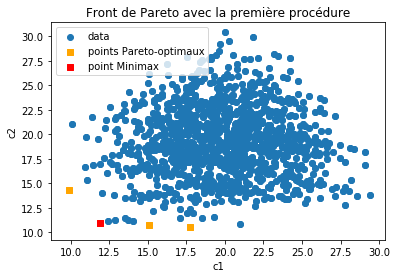

In [299]:
show_pareto_front(all_sets, front1, minimax=minimax_sol1, title="avec la première procédure")

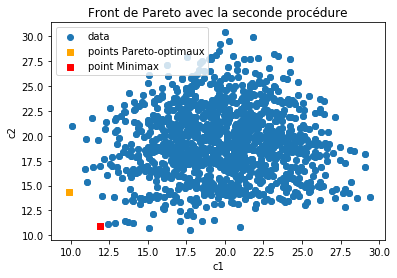

In [301]:
show_pareto_front(all_sets, pareto_front2, minimax=minimax_sol2, title="avec la seconde procédure")

On remarque que le front de Pareto est plus restreint avec la seconde procédure, cela est dû au fait que la I-dominance est plus stricte.

## Temps d'exécution

Progression: [####################] 100.0%


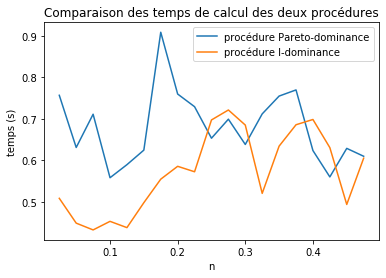

NameError: name 'times_naive' is not defined

In [318]:
compare_procedures(two_phased_pareto, two_phased_idominance, nb_iter=1)